<h3>O problema da mochila consistem em colocar em preencher uma mochila com objetos de diferentes pesos e valores. O objetivo é que se preencha a mochila com o maior valor possível sem que ultrapasse o peso máximo. Neste projeto é usado algoritmo genético (meta-heurística) para que se tenha o valor aproximado da solução ótima.</h3>

In [1]:
# Import das bibliotecas utilzadas
import pygad
import random
import numpy as np

In [9]:
# Infomrado os pesos e os valores dos produtos

# Peso dos produtos
peso_produtos =  [7, 8, 4, 10, 4, 6, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,  2,  5]
# Valor dos produtos
valor_produtos = [5, 8, 3,  2, 7, 9, 4, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 4, 10, 14]

# Peso total permitido dentro da mochila
peso_permitido_produtos = 22

In [10]:
# Inicializa os parametros

# Representa a quantidade de cromossomos
num_linhas = 100
# Representa a quantidade de genes
num_colunas = len(peso_produtos)

# inicializa um numpy array contendo a quantidade de indices, o resulta da multiplicação 
# entre o numero de cromossomo e a quantidade de genes (ex: se existir 100 cromossomos e 10 genes cada,
# o resultado final será de 1000 posições no array com valor 0)
cromossomos = np.ones(num_linhas*num_colunas)

# Para cada posição no numpy array, é atribuido de forma arbitrária o valor 0 ou 1 para gerar
# uma lista com a população inicial 
cromossomos = [ random.randint(0,1) for x in cromossomos]

# Converte a lista em numpy array
cromossomos = np.asarray(cromossomos)

# Redimensiona o array numpy para que contenha a quantidade de linhas (representando os cromossomos)
# e a quantidae de colunas para cada linha (representano os genes)
cromossomos = cromossomos.reshape(num_linhas,num_colunas)

In [11]:
# Função de avaliação para a solução do Knapsack problem
def fitness_func(solution, solution_idx):

    # Multiplica cada posição do cromossomo (representado por números binários) pelo peso dos produtos
    peso_produtos_selecionados = np.sum(solution * peso_produtos)

    # Multiplica cada posição do cromossomo (representado por números binários) pelo valor dos produtos
    valor_produtos_selecionados = np.sum(solution * valor_produtos)

    # Calcula a diferença entre o peso contido na solução e o peso permitido na mochila
    peso_ultrapassado = peso_produtos_selecionados-peso_permitido_produtos if peso_produtos_selecionados-peso_permitido_produtos > 0 else 0

    # Calcula o Fitness da solução
    # O resultado da fitness é o valor dos produtos menos o peso ultrapassado na mochila
    # O valor do produto é multiplicado por 10 para elevear o valor de fitness
    # O peso do produto é o peso permitido da mochila multiplicado pelo peso ultrapassado ao quadrado,%%!
    # assim quanto maior a distância do peso permitido em relação ao peso calculado, maior será 
    # a penalidade para redução de fitness
    fitness = (valor_produtos_selecionados*10)-(peso_permitido_produtos*(peso_ultrapassado**2))

    return fitness

In [12]:
# Gera o objeto do pygad para execução do algoritmo
ga_instance = pygad.GA(num_generations=200,
                      num_parents_mating=5,
                      fitness_func=fitness_func,
                      num_genes=num_colunas,
                      initial_population=cromossomos,
                      mutation_percent_genes=0.01,
                      mutation_type="random",
                      sol_per_pop=num_linhas,
                      mutation_num_genes=1,
                      mutation_by_replacement=True,
                      random_mutation_min_val=0,
                      random_mutation_max_val=1,
                      delay_after_gen=0.2,
                      crossover_type="two_points")

In [13]:
# Roda o algoritmo
ga_instance.run()

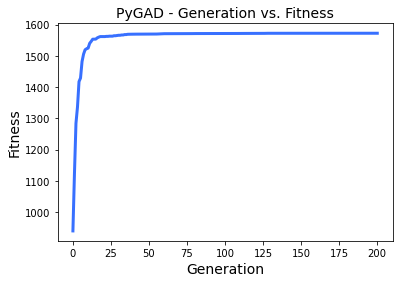

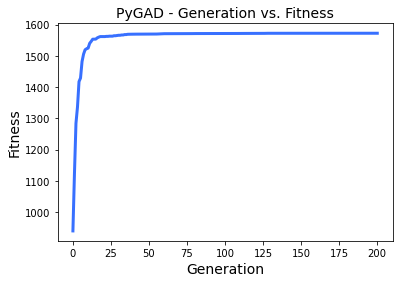

In [14]:
# Aprenseta a curva referente as gerações e o valor de fitness
# Percebe-se que muito no início, na geração 25 já converge para
# O valor de fitness com a melhor solução encontrada pelo 
# algoritmo genético
ga_instance.plot_fitness()

In [15]:
# Apresentação dos resultados obtidos pelo algoritmo
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution = np.around(solution)
print("Parameter of the best solution : {solution} ".format(solution=solution))
print("Pesos = ", peso_produtos)
print("valor_produto", valor_produtos)
print("Fitness value of the best solution = {solution_fitness} ".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx} ".format(solution_idx=solution_idx))

print('Peso = ', np.sum(solution*peso_produtos))
print('Valor = ', np.sum(solution*valor_produtos))

Parameter of the best solution : [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.] 
Pesos =  [7, 8, 4, 10, 4, 6, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5]
valor_produto [5, 8, 3, 2, 7, 9, 4, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 4, 10, 14]
Fitness value of the best solution = 1572.3396343340944 
Index of the best solution : 0 
Peso =  24.0
Valor =  162.0
